COMPARATIVE PERFORMANCE ANALYSIS OF NEURAL NETWORK ARCHITECTURES FOR SUPERVISED IMAGE RECOGNITION TASK.

BASELINE CNN

In [ ]:
pip install tensorflow keras matplotlib numpy scikit-learn


In [ ]:
# importing libraries

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# hyperparameters are fixed for each model
SEED = 42
BATCH_SIZE = 64
EPOCHS = 10
LR = 0.001

torch.manual_seed(SEED)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# -------------------------
# Data pipeline (same for all models)
# -------------------------
mean = (0.4914, 0.4822, 0.4465)
std = (0.2470, 0.2435, 0.2616)

transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

# -------------------------
# Baseline CNN definition
# -------------------------
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 4 * 4, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# -------------------------
# Train & Test functions
# -------------------------
def train(model, optimizer, criterion, epochs=EPOCHS):
    model.train()
    for epoch in range(epochs):
        running_loss, running_correct, total = 0.0, 0, 0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * labels.size(0)
            running_correct += (outputs.argmax(1) == labels).sum().item()
            total += labels.size(0)

        print(f"Epoch {epoch+1}/{epochs} | Loss: {running_loss/total:.4f} | Acc: {running_correct/total*100:.2f}%")

def test(model, criterion):
    model.eval()
    total_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            total_loss += loss.item() * labels.size(0)
            correct += (outputs.argmax(1) == labels).sum().item()
            total += labels.size(0)

    accuracy = correct/total*100
    print(f"Test Loss: {total_loss/total:.4f} | Test Acc: {accuracy:.2f}%")
    return accuracy

# -------------------------
# Main
# -------------------------
if __name__ == "__main__":
    model = SimpleCNN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=LR)

    print("Training baseline CNN...")
    train(model, optimizer, criterion, epochs=EPOCHS)
    print("Evaluating on test set...")
    test_accuracy = test(model, criterion)

100%|██████████| 170M/170M [00:03<00:00, 52.3MB/s]


Training baseline CNN...
Epoch 1/10 | Loss: 1.5248 | Acc: 44.16%
Epoch 2/10 | Loss: 1.1305 | Acc: 59.52%
Epoch 3/10 | Loss: 0.9458 | Acc: 66.54%
Epoch 4/10 | Loss: 0.8488 | Acc: 70.15%
Epoch 5/10 | Loss: 0.7795 | Acc: 72.51%
Epoch 6/10 | Loss: 0.7264 | Acc: 74.68%
Epoch 7/10 | Loss: 0.6984 | Acc: 75.70%
Epoch 8/10 | Loss: 0.6631 | Acc: 76.80%
Epoch 9/10 | Loss: 0.6331 | Acc: 77.87%
Epoch 10/10 | Loss: 0.6196 | Acc: 78.51%
Evaluating on test set...
Test Loss: 0.6377 | Test Acc: 78.51%


Epoch 1/1 | Loss: 1.5396 | Acc: 43.41%
Test Loss: 1.1887 | Test Acc: 56.18%
Epoch 1/10 - Test Acc: 56.18%
Epoch 1/1 | Loss: 1.1479 | Acc: 58.42%
Test Loss: 1.0664 | Test Acc: 62.57%
Epoch 2/10 - Test Acc: 62.57%
Epoch 1/1 | Loss: 0.9803 | Acc: 65.10%
Test Loss: 0.9009 | Test Acc: 67.86%
Epoch 3/10 - Test Acc: 67.86%
Epoch 1/1 | Loss: 0.8750 | Acc: 69.10%
Test Loss: 0.7850 | Test Acc: 72.51%
Epoch 4/10 - Test Acc: 72.51%
Epoch 1/1 | Loss: 0.8013 | Acc: 71.79%
Test Loss: 0.7327 | Test Acc: 74.54%
Epoch 5/10 - Test Acc: 74.54%
Epoch 1/1 | Loss: 0.7506 | Acc: 73.66%
Test Loss: 0.7752 | Test Acc: 73.54%
Epoch 6/10 - Test Acc: 73.54%
Epoch 1/1 | Loss: 0.7027 | Acc: 75.41%
Test Loss: 0.6862 | Test Acc: 76.45%
Epoch 7/10 - Test Acc: 76.45%
Epoch 1/1 | Loss: 0.6733 | Acc: 76.44%
Test Loss: 0.6953 | Test Acc: 76.02%
Epoch 8/10 - Test Acc: 76.02%
Epoch 1/1 | Loss: 0.6483 | Acc: 77.37%
Test Loss: 0.6725 | Test Acc: 77.05%
Epoch 9/10 - Test Acc: 77.05%
Epoch 1/1 | Loss: 0.6178 | Acc: 78.50%
Test Lo

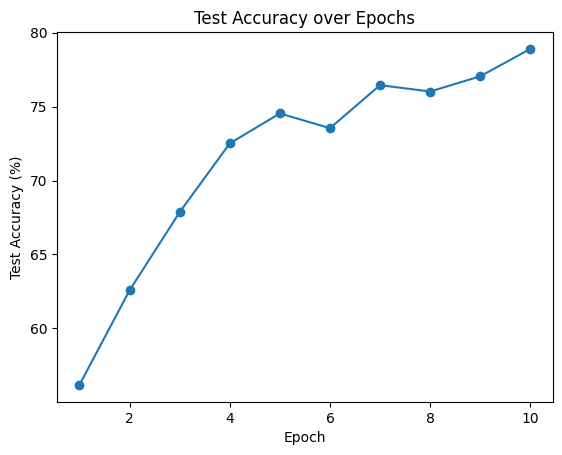


Final Test Accuracy: 78.90%


In [ ]:
import matplotlib.pyplot as plt

if __name__ == "__main__":
    model = SimpleCNN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=LR)

    test_acc_list = []

    for epoch in range(EPOCHS):
        train(model, optimizer, criterion, epochs=1)
        acc = test(model, criterion)
        test_acc_list.append(acc)
        print(f"Epoch {epoch+1}/{EPOCHS} - Test Acc: {acc:.2f}%")

    # Plot test accuracy
    plt.plot(range(1, EPOCHS+1), test_acc_list, marker='o')
    plt.xlabel("Epoch")
    plt.ylabel("Test Accuracy (%)")
    plt.title("Test Accuracy over Epochs")
    plt.show()

    print(f"\nFinal Test Accuracy: {test_acc_list[-1]:.2f}%")


Training baseline CNN...
Epoch 1/10 | Loss: 1.5276 | Acc: 44.03%
Epoch 2/10 | Loss: 1.1313 | Acc: 59.48%
Epoch 3/10 | Loss: 0.9470 | Acc: 66.63%
Epoch 4/10 | Loss: 0.8454 | Acc: 70.26%
Epoch 5/10 | Loss: 0.7716 | Acc: 72.70%
Epoch 6/10 | Loss: 0.7283 | Acc: 74.30%
Epoch 7/10 | Loss: 0.6876 | Acc: 75.81%
Epoch 8/10 | Loss: 0.6534 | Acc: 77.10%
Epoch 9/10 | Loss: 0.6282 | Acc: 77.98%
Epoch 10/10 | Loss: 0.6091 | Acc: 78.57%
Evaluating on test set...
Test Loss: 0.6254 | Test Acc: 78.77%


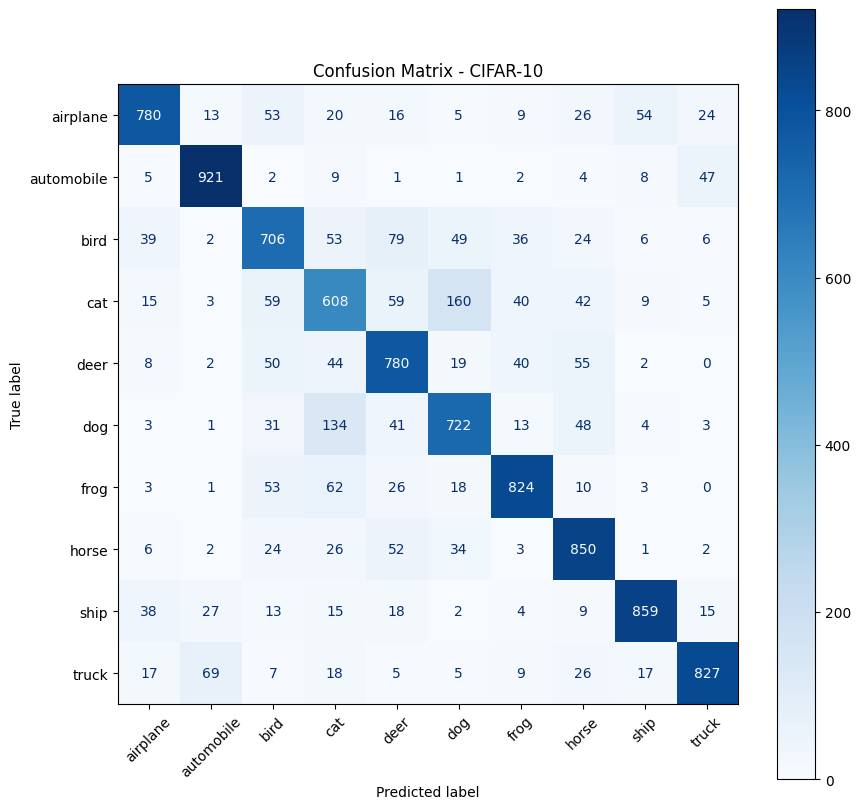

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

def test_with_confusion_matrix(model, criterion, classes):
    model.eval()
    total_loss, correct, total = 0.0, 0, 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            total_loss += loss.item() * labels.size(0)
            correct += (outputs.argmax(1) == labels).sum().item()
            total += labels.size(0)

            # Collect predictions and labels for confusion matrix
            preds = outputs.argmax(1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy())

    accuracy = correct / total * 100
    print(f"Test Loss: {total_loss/total:.4f} | Test Acc: {accuracy:.2f}%")

    # Confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    fig, ax = plt.subplots(figsize=(10, 10))
    disp.plot(ax=ax, cmap="Blues", xticks_rotation=45)
    plt.title("Confusion Matrix - CIFAR-10")
    plt.show()

    return accuracy, cm

# -------------------------
# Main (updated)
# -------------------------
if __name__ == "__main__":
    model = SimpleCNN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=LR)

    print("Training baseline CNN...")
    train(model, optimizer, criterion, epochs=EPOCHS)
    print("Evaluating on test set...")

    classes = trainset.classes  # CIFAR-10 class names
    test_accuracy, cm = test_with_confusion_matrix(model, criterion, classes)


Training baseline CNN...
Epoch 1/10 | Loss: 1.5201 | Acc: 44.58%
Epoch 2/10 | Loss: 1.1199 | Acc: 59.79%
Epoch 3/10 | Loss: 0.9454 | Acc: 66.69%
Epoch 4/10 | Loss: 0.8432 | Acc: 70.33%
Epoch 5/10 | Loss: 0.7739 | Acc: 72.93%
Epoch 6/10 | Loss: 0.7228 | Acc: 74.73%
Epoch 7/10 | Loss: 0.6917 | Acc: 75.62%
Epoch 8/10 | Loss: 0.6565 | Acc: 77.04%
Epoch 9/10 | Loss: 0.6253 | Acc: 78.03%
Epoch 10/10 | Loss: 0.6044 | Acc: 78.81%
Evaluating on test set with precision, recall, F1...
Test Loss: 0.6339 | Test Acc: 78.03%

Classification Report:
              precision    recall  f1-score   support

    airplane       0.83      0.75      0.79      1000
  automobile       0.82      0.94      0.87      1000
        bird       0.69      0.68      0.68      1000
         cat       0.60      0.68      0.64      1000
        deer       0.79      0.75      0.77      1000
         dog       0.75      0.64      0.69      1000
        frog       0.84      0.81      0.83      1000
       horse       0.85    

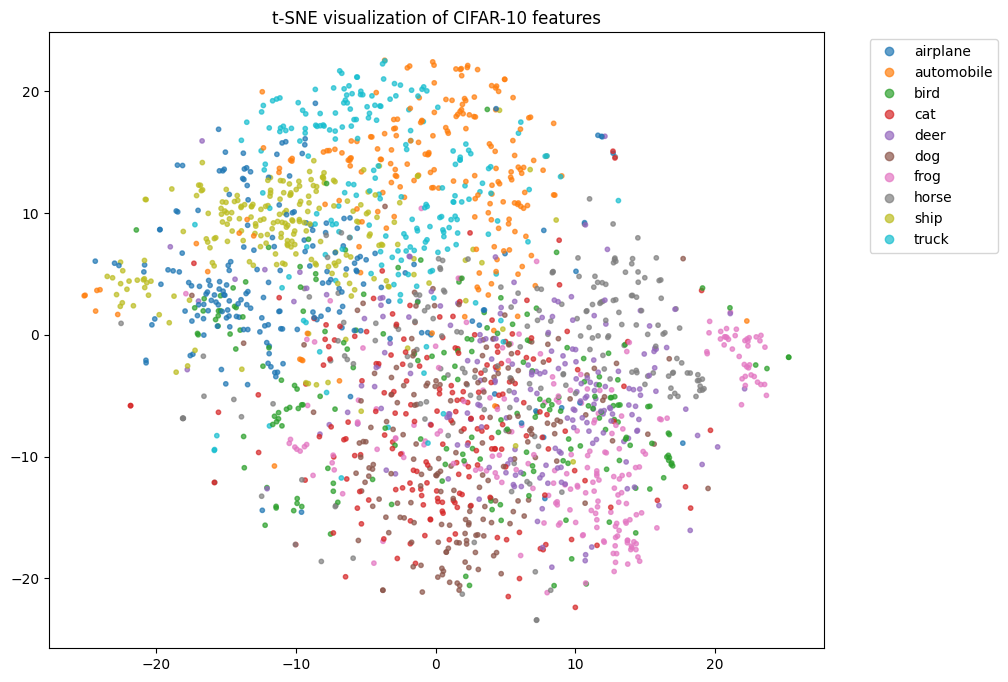

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

def extract_features(model, dataloader, num_samples=2000):
    """Extract features from the penultimate layer for t-SNE."""
    model.eval()
    features, labels = [], []
    count = 0

    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)

            # forward through feature extractor only
            feats = model.features(inputs)
            feats = torch.flatten(feats, 1)   # flatten before FC

            features.append(feats.cpu().numpy())
            labels.append(targets.cpu().numpy())

            count += inputs.size(0)
            if count >= num_samples:   # limit for speed
                break

    features = np.concatenate(features, axis=0)[:num_samples]
    labels = np.concatenate(labels, axis=0)[:num_samples]
    return features, labels

def tsne_visualization(model, dataloader, num_samples=2000):
    features, labels = extract_features(model, dataloader, num_samples=num_samples)

    print("Running t-SNE... this may take a minute.")
    tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=SEED)
    reduced = tsne.fit_transform(features)

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(reduced[:,0], reduced[:,1], c=labels, cmap="tab10", s=10, alpha=0.7)
    plt.legend(handles=scatter.legend_elements()[0], labels=trainset.classes, bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.title("t-SNE visualization of CIFAR-10 features")
    plt.show()

# -------------------------
# In main, after training/testing
# -------------------------
if __name__ == "__main__":
    model = SimpleCNN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=LR)

    print("Training baseline CNN...")
    train(model, optimizer, criterion, epochs=EPOCHS)

    print("Evaluating on test set with precision, recall, F1...")
    test_accuracy = test_with_metrics(model, criterion)

    print("Generating t-SNE visualization...")
    tsne_visualization(model, testloader, num_samples=2000)


# CNN WITH BATCH NORMALISATION AND DROPOUT

100%|██████████| 170M/170M [00:02<00:00, 72.5MB/s]


Epoch 1/10 - Train Loss: 1.4351, Train Acc: 47.67% Val Loss: 1.0567, Val Acc: 62.23%
Epoch 2/10 - Train Loss: 1.1250, Train Acc: 59.99% Val Loss: 0.9012, Val Acc: 68.27%
Epoch 3/10 - Train Loss: 1.0228, Train Acc: 63.67% Val Loss: 0.8475, Val Acc: 70.14%
Epoch 4/10 - Train Loss: 0.9512, Train Acc: 66.17% Val Loss: 0.7683, Val Acc: 72.94%
Epoch 5/10 - Train Loss: 0.8976, Train Acc: 68.22% Val Loss: 0.7935, Val Acc: 71.77%
Epoch 6/10 - Train Loss: 0.8603, Train Acc: 69.68% Val Loss: 0.6807, Val Acc: 76.49%
Epoch 7/10 - Train Loss: 0.8239, Train Acc: 71.10% Val Loss: 0.7325, Val Acc: 73.91%
Epoch 8/10 - Train Loss: 0.8003, Train Acc: 72.05% Val Loss: 0.6603, Val Acc: 77.02%
Epoch 9/10 - Train Loss: 0.7726, Train Acc: 72.72% Val Loss: 0.7809, Val Acc: 72.36%
Epoch 10/10 - Train Loss: 0.7514, Train Acc: 73.80% Val Loss: 0.6853, Val Acc: 75.87%


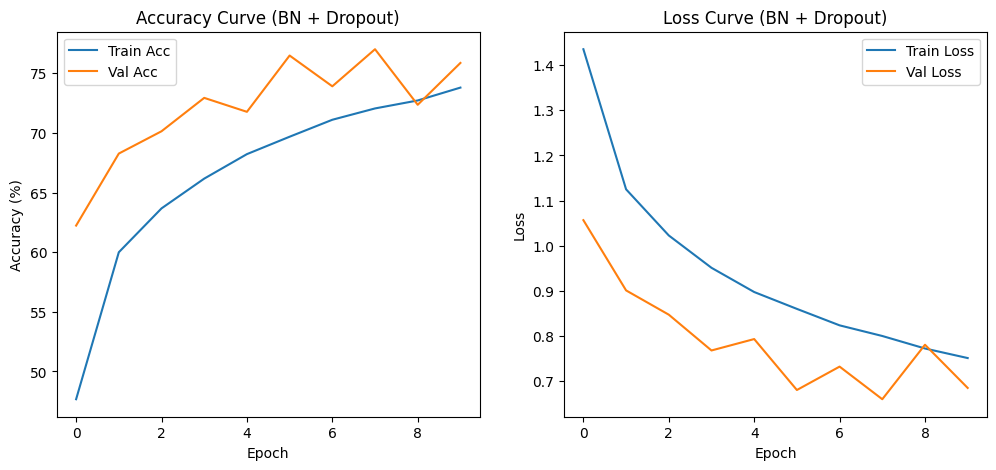

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# -------------------------------
# Data preparation (same as before)
# -------------------------------
mean = (0.4914, 0.4822, 0.4465)
std = (0.2470, 0.2435, 0.2616)

transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

# -------------------------------
# CNN with BatchNorm + Dropout
# -------------------------------
class CNN_BN_Dropout(nn.Module):
    def __init__(self):
        super(CNN_BN_Dropout, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.25),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(0.25),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 8 * 8, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 10),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# -------------------------------
# Training setup
# -------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = CNN_BN_Dropout().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

epochs = 10
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# -------------------------------
# Training loop with logging
# -------------------------------
for epoch in range(epochs):
    net.train()
    correct, total, running_loss = 0, 0, 0.0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(trainloader))
    train_accuracies.append(100 * correct / total)

    # validation
    net.eval()
    correct, total, val_loss = 0, 0, 0.0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_losses.append(val_loss / len(testloader))
    val_accuracies.append(100 * correct / total)

    print(f"Epoch {epoch+1}/{epochs} - "
          f"Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.2f}% "
          f"Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.2f}%")

# -------------------------------
# Plotting curves
# -------------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_accuracies, label='Train Acc')
plt.plot(val_accuracies, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Curve (BN + Dropout)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve (BN + Dropout)')
plt.legend()

plt.show()

In [ ]:
# -------------------------------
# Final Testing Accuracy
# -------------------------------
net.eval()
correct, total = 0, 0

with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Final Test Accuracy: {test_accuracy:.2f}%")


Final Test Accuracy: 79.12%


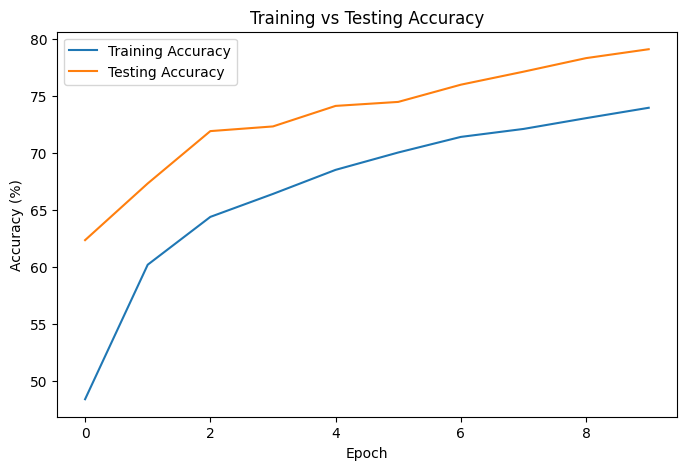

In [ ]:
# -------------------------------
# Plot Training vs Testing Accuracy
# -------------------------------
plt.figure(figsize=(8,5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training vs Testing Accuracy')
plt.legend()
plt.show()



Classification Report (CIFAR-10):
              precision    recall  f1-score   support

    airplane       0.65      0.90      0.76      1000
  automobile       0.86      0.88      0.87      1000
        bird       0.66      0.71      0.69      1000
         cat       0.67      0.55      0.60      1000
        deer       0.86      0.62      0.72      1000
         dog       0.69      0.71      0.70      1000
        frog       0.85      0.85      0.85      1000
       horse       0.82      0.79      0.81      1000
        ship       0.90      0.83      0.86      1000
       truck       0.82      0.88      0.85      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000

Running t-SNE... this may take a few minutes


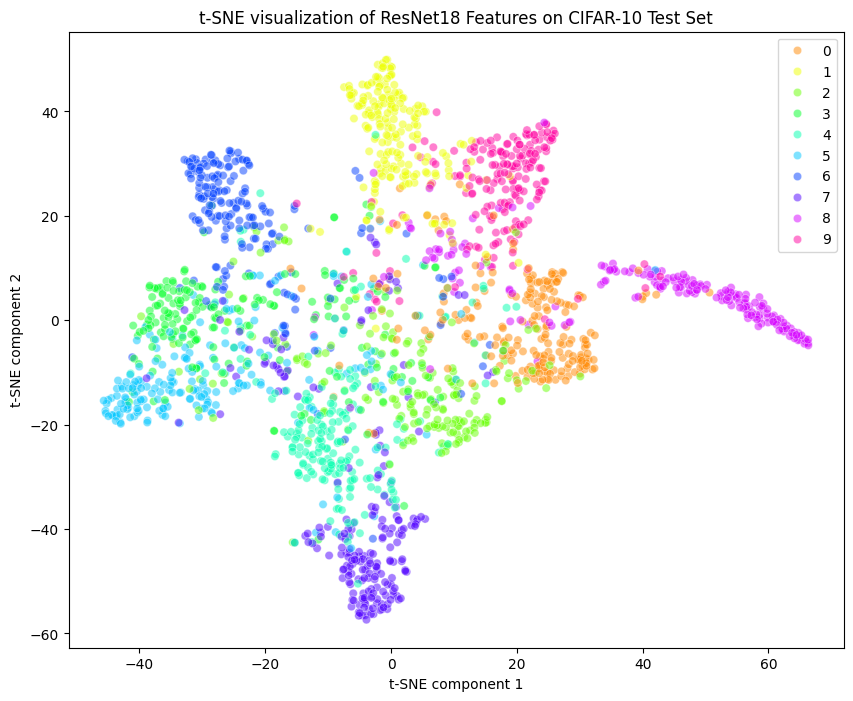

In [ ]:
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE
import seaborn as sns
import numpy as np

# -----------------------------
# Classification Report
# -----------------------------
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print("\nClassification Report (CIFAR-10):")
print(classification_report(all_labels, all_preds, target_names=trainset.classes))

# -----------------------------
# t-SNE Visualization
# -----------------------------
# Take features before the final FC layer
feature_extractor = nn.Sequential(*list(model.children())[:-1])
features, labels = [], []

with torch.no_grad():
    for inputs, lbls in testloader:
        inputs = inputs.to(device)
        feats = feature_extractor(inputs)  # [batch, 512, 1, 1]
        feats = feats.view(feats.size(0), -1)  # flatten
        features.append(feats.cpu().numpy())
        labels.extend(lbls.numpy())

features = np.concatenate(features, axis=0)
labels = np.array(labels)

# Subsample for faster t-SNE (e.g., 2000 samples)
idx = np.random.choice(len(features), size=2000, replace=False)
features_subset = features[idx]
labels_subset = labels[idx]

print("Running t-SNE... this may take a few minutes")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
features_2d = tsne.fit_transform(features_subset)

# Plot t-SNE
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=features_2d[:, 0], y=features_2d[:, 1],
    hue=labels_subset,
    palette=sns.color_palette("hsv", 10),
    legend="full",
    alpha=0.5
)
plt.title("t-SNE visualization of ResNet18 Features on CIFAR-10 Test Set")
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.show()

# RESNET18

100%|██████████| 170M/170M [00:04<00:00, 36.4MB/s]


Epoch [1/10] Train Loss: 1.5419, Train Acc: 43.58% Val Loss: 1.2500, Val Acc: 55.40%
Epoch [2/10] Train Loss: 1.1815, Train Acc: 57.69% Val Loss: 1.1332, Val Acc: 61.51%
Epoch [3/10] Train Loss: 1.0229, Train Acc: 63.62% Val Loss: 0.9823, Val Acc: 66.22%
Epoch [4/10] Train Loss: 0.9082, Train Acc: 68.07% Val Loss: 0.9955, Val Acc: 66.57%
Epoch [5/10] Train Loss: 0.8379, Train Acc: 70.76% Val Loss: 0.8390, Val Acc: 70.84%
Epoch [6/10] Train Loss: 0.7801, Train Acc: 72.81% Val Loss: 0.7763, Val Acc: 73.54%
Epoch [7/10] Train Loss: 0.7375, Train Acc: 74.24% Val Loss: 0.7555, Val Acc: 74.16%
Epoch [8/10] Train Loss: 0.6944, Train Acc: 75.79% Val Loss: 0.7844, Val Acc: 73.01%
Epoch [9/10] Train Loss: 0.6574, Train Acc: 77.06% Val Loss: 0.6899, Val Acc: 75.85%
Epoch [10/10] Train Loss: 0.6290, Train Acc: 78.05% Val Loss: 0.6700, Val Acc: 77.17%


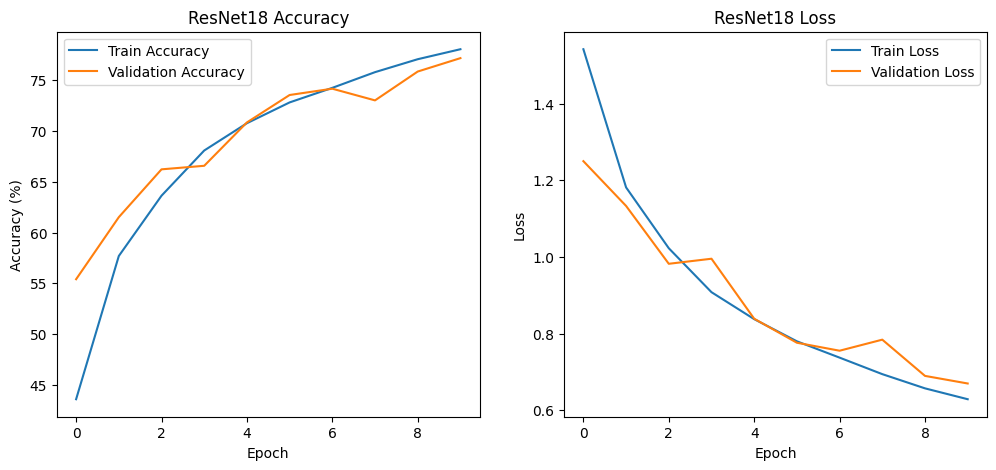

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# -----------------------------
# Data Augmentation (same as CNN)
# -----------------------------
mean = (0.4914, 0.4822, 0.4465)
std = (0.2470, 0.2435, 0.2616)

transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

# -----------------------------
# Define ResNet18 model
# -----------------------------
from torchvision.models import resnet18

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = resnet18(weights=None, num_classes=10)  # No pretraining, output layer for CIFAR10
model = model.to(device)

# -----------------------------
# Loss and Optimizer (same as CNN)
# -----------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# -----------------------------
# Training Loop with history
# -----------------------------
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(trainloader)
    train_acc = 100. * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_loss = val_loss / len(testloader)
    val_acc = 100. * correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

# -----------------------------
# Plot Accuracy and Loss
# -----------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("ResNet18 Accuracy")

plt.subplot(1,2,2)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("ResNet18 Loss")

plt.show()


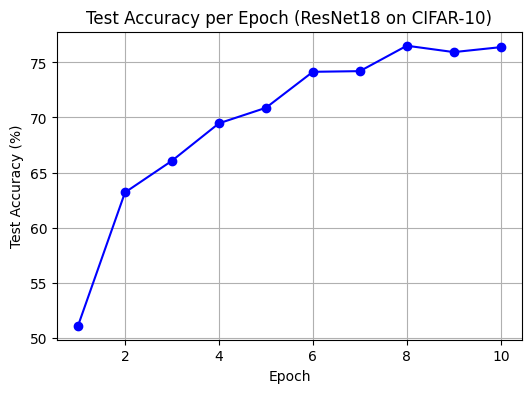

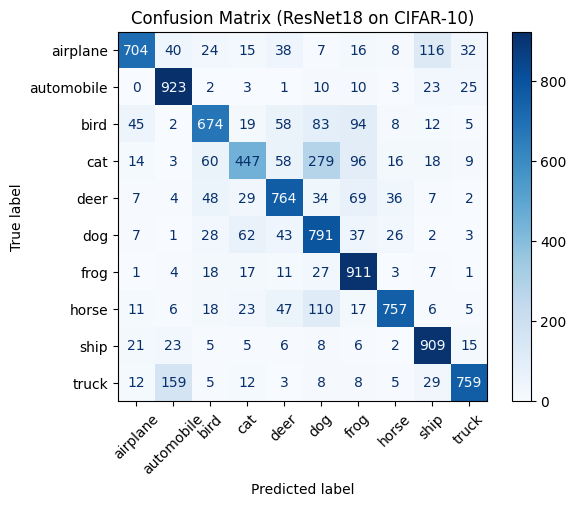

In [ ]:
# -----------------------------
# Test Accuracy Curve (Val Acc per epoch)
# -----------------------------
plt.figure(figsize=(6,4))
plt.plot(range(1, len(val_accuracies)+1), val_accuracies, marker='o', color='blue')
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy (%)")
plt.title("Test Accuracy per Epoch (ResNet18 on CIFAR-10)")
plt.grid(True)
plt.show()

# -----------------------------
# Confusion Matrix on Test Set
# -----------------------------
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=trainset.classes)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix (ResNet18 on CIFAR-10)")
plt.show()



Classification Report (CIFAR-10):
              precision    recall  f1-score   support

    airplane       0.65      0.90      0.76      1000
  automobile       0.86      0.88      0.87      1000
        bird       0.66      0.71      0.69      1000
         cat       0.67      0.55      0.60      1000
        deer       0.86      0.62      0.72      1000
         dog       0.69      0.71      0.70      1000
        frog       0.85      0.85      0.85      1000
       horse       0.82      0.79      0.81      1000
        ship       0.90      0.83      0.86      1000
       truck       0.82      0.88      0.85      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000

Running t-SNE... this may take a few minutes


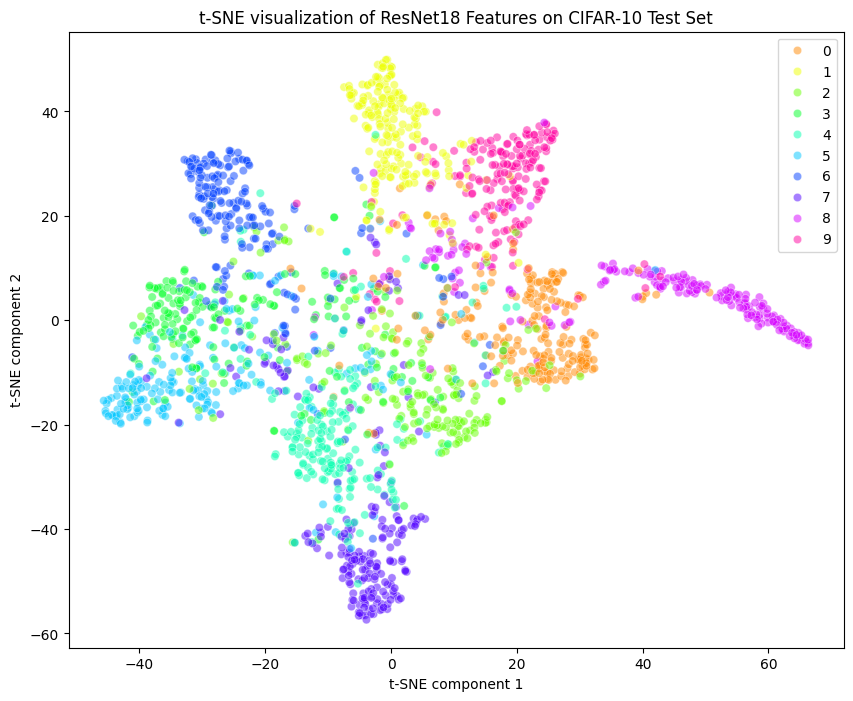

In [ ]:
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE
import seaborn as sns
import numpy as np

# -----------------------------
# Classification Report
# -----------------------------
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print("\nClassification Report (CIFAR-10):")
print(classification_report(all_labels, all_preds, target_names=trainset.classes))

# -----------------------------
# t-SNE Visualization
# -----------------------------
# Take features before the final FC layer
feature_extractor = nn.Sequential(*list(model.children())[:-1])
features, labels = [], []

with torch.no_grad():
    for inputs, lbls in testloader:
        inputs = inputs.to(device)
        feats = feature_extractor(inputs)  # [batch, 512, 1, 1]
        feats = feats.view(feats.size(0), -1)  # flatten
        features.append(feats.cpu().numpy())
        labels.extend(lbls.numpy())

features = np.concatenate(features, axis=0)
labels = np.array(labels)

# Subsample for faster t-SNE (e.g., 2000 samples)
idx = np.random.choice(len(features), size=2000, replace=False)
features_subset = features[idx]
labels_subset = labels[idx]

print("Running t-SNE... this may take a few minutes")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
features_2d = tsne.fit_transform(features_subset)

# Plot t-SNE
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=features_2d[:, 0], y=features_2d[:, 1],
    hue=labels_subset,
    palette=sns.color_palette("hsv", 10),
    legend="full",
    alpha=0.5
)
plt.title("t-SNE visualization of ResNet18 Features on CIFAR-10 Test Set")
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.show()

# RESNET34

100%|██████████| 170M/170M [00:02<00:00, 79.7MB/s]


Epoch [1/10] Train Loss: 1.6092, Train Acc: 41.32% Val Loss: 1.4832, Val Acc: 48.92%
Epoch [2/10] Train Loss: 1.2356, Train Acc: 55.61% Val Loss: 1.1236, Val Acc: 60.54%
Epoch [3/10] Train Loss: 1.0632, Train Acc: 62.43% Val Loss: 0.9820, Val Acc: 66.03%
Epoch [4/10] Train Loss: 0.9493, Train Acc: 66.63% Val Loss: 1.0625, Val Acc: 64.71%
Epoch [5/10] Train Loss: 0.8736, Train Acc: 69.30% Val Loss: 0.9045, Val Acc: 68.57%
Epoch [6/10] Train Loss: 0.8051, Train Acc: 71.87% Val Loss: 0.8006, Val Acc: 72.64%
Epoch [7/10] Train Loss: 0.7485, Train Acc: 73.84% Val Loss: 0.7490, Val Acc: 74.30%
Epoch [8/10] Train Loss: 0.7114, Train Acc: 75.36% Val Loss: 0.7312, Val Acc: 75.38%
Epoch [9/10] Train Loss: 0.6730, Train Acc: 76.67% Val Loss: 0.6892, Val Acc: 76.11%
Epoch [10/10] Train Loss: 0.6435, Train Acc: 77.39% Val Loss: 0.6381, Val Acc: 78.31%


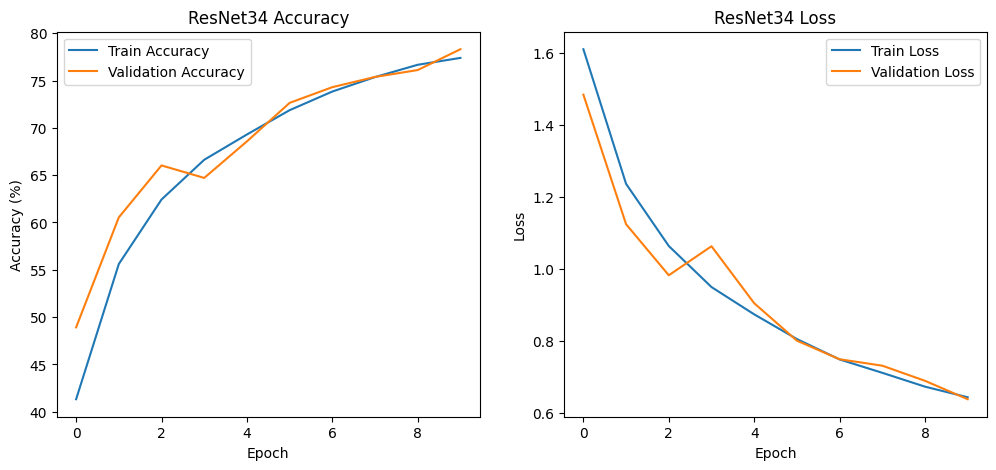

[Epoch 1] Train Acc: 41.96% | Val Acc: 53.00%
[Epoch 2] Train Acc: 56.82% | Val Acc: 59.36%
[Epoch 3] Train Acc: 63.20% | Val Acc: 63.69%
[Epoch 4] Train Acc: 66.99% | Val Acc: 67.20%
[Epoch 5] Train Acc: 69.83% | Val Acc: 71.31%
[Epoch 6] Train Acc: 72.16% | Val Acc: 72.36%
[Epoch 7] Train Acc: 74.17% | Val Acc: 73.79%
[Epoch 8] Train Acc: 75.53% | Val Acc: 76.22%
[Epoch 9] Train Acc: 76.52% | Val Acc: 75.77%
[Epoch 10] Train Acc: 77.43% | Val Acc: 76.57%
Finished Training


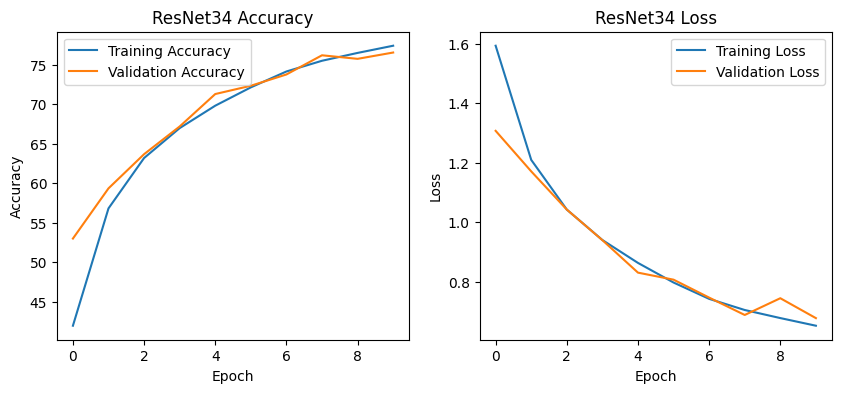

Final Test Accuracy (ResNet34): 76.57%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# -----------------------------
# Data Augmentation (same as CNN)
# -----------------------------
mean = (0.4914, 0.4822, 0.4465)
std = (0.2470, 0.2435, 0.2616)

transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

# -----------------------------
# Define ResNet34 model
# -----------------------------
from torchvision.models import resnet34

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = resnet34(weights=None, num_classes=10)  # No pretraining, output layer for CIFAR10
model = model.to(device)

# -----------------------------
# Loss and Optimizer (same as CNN)
# -----------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# -----------------------------
# Training Loop with history
# -----------------------------
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(trainloader)
    train_acc = 100. * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_loss = val_loss / len(testloader)
    val_acc = 100. * correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

# -----------------------------
# Plot Accuracy and Loss
# -----------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("ResNet34 Accuracy")

plt.subplot(1,2,2)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("ResNet34 Loss")

plt.show()
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision.models as models

# ----------------------------
# Data augmentation (same as before)
# ----------------------------
mean = (0.4914, 0.4822, 0.4465)
std = (0.2470, 0.2435, 0.2616)

transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

# ----------------------------
# ResNet34 model (modified for CIFAR10)
# ----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = models.resnet34(weights=None)   # No pretrained weights
net.fc = nn.Linear(net.fc.in_features, 10)  # Change final layer to 10 classes
net = net.to(device)

# ----------------------------
# Loss & Optimizer
# ----------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# ----------------------------
# Training history
# ----------------------------
train_acc_history, val_acc_history = [], []
train_loss_history, val_loss_history = [], []

# ----------------------------
# Training loop
# ----------------------------
for epoch in range(10):  # same as before
    net.train()
    running_loss, correct, total = 0.0, 0, 0

    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(trainloader)
    epoch_acc = 100 * correct / total
    train_loss_history.append(epoch_loss)
    train_acc_history.append(epoch_acc)

    # ----------------------------
    # Validation
    # ----------------------------
    net.eval()
    val_correct, val_total, val_loss = 0, 0, 0.0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_acc = 100 * val_correct / val_total
    val_loss = val_loss / len(testloader)
    val_acc_history.append(val_acc)
    val_loss_history.append(val_loss)

    print(f"[Epoch {epoch+1}] Train Acc: {epoch_acc:.2f}% | Val Acc: {val_acc:.2f}%")

print("Finished Training")

# ----------------------------
# Plotting training history
# ----------------------------
plt.figure(figsize=(10,4))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(train_acc_history, label='Training Accuracy')
plt.plot(val_acc_history, label='Validation Accuracy')
plt.title('ResNet34 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(train_loss_history, label='Training Loss')
plt.plot(val_loss_history, label='Validation Loss')
plt.title('ResNet34 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# ----------------------------
# Final Test Accuracy
# ----------------------------
net.eval()
correct, total = 0, 0
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Final Test Accuracy (ResNet34): {test_accuracy:.2f}%")


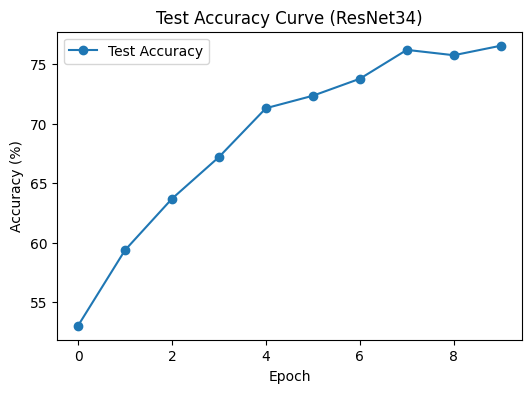

In [ ]:
# ----------------------------
# Test Accuracy Curve (Validation Accuracy per Epoch)
# ----------------------------
plt.figure(figsize=(6,4))
plt.plot(val_acc_history, marker='o', label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Test Accuracy Curve (ResNet34)")
plt.legend()
plt.show()


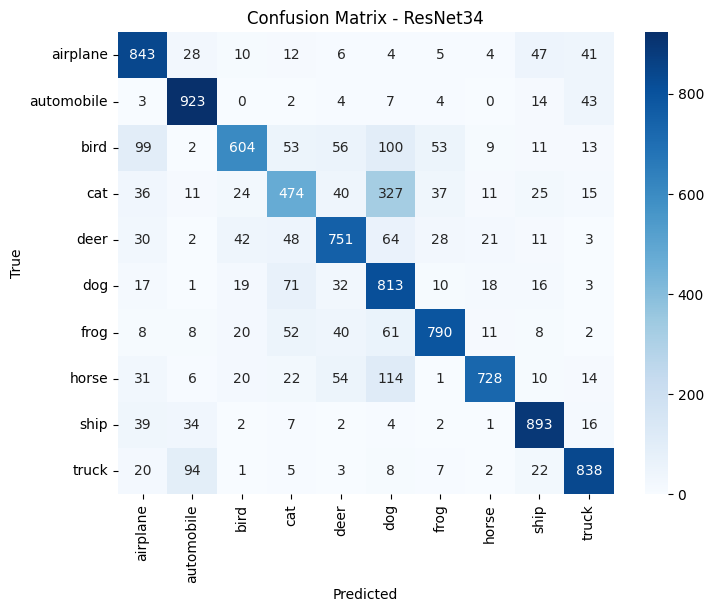

Classification Report:

              precision    recall  f1-score   support

    airplane       0.75      0.84      0.79      1000
  automobile       0.83      0.92      0.88      1000
        bird       0.81      0.60      0.69      1000
         cat       0.64      0.47      0.54      1000
        deer       0.76      0.75      0.76      1000
         dog       0.54      0.81      0.65      1000
        frog       0.84      0.79      0.82      1000
       horse       0.90      0.73      0.81      1000
        ship       0.84      0.89      0.87      1000
       truck       0.85      0.84      0.84      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.76     10000
weighted avg       0.78      0.77      0.76     10000



/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


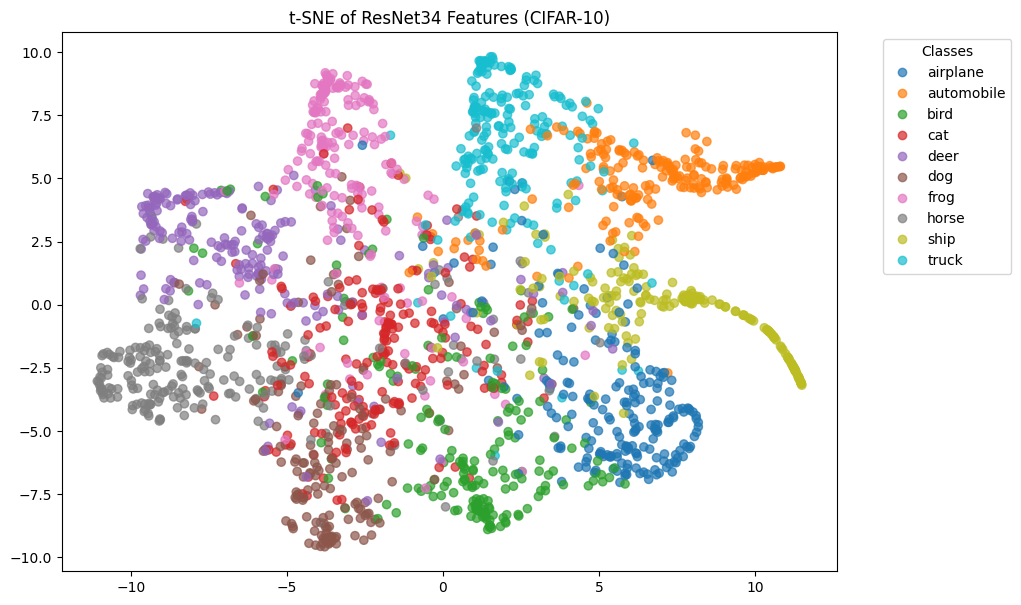

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.manifold import TSNE
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Collect predictions & features
# ----------------------------
all_preds, all_labels, features = [], [], []

# Define a hook to capture features from penultimate layer
def hook(module, input, output):
    features.append(output.detach().cpu().numpy())

# For ResNet34, penultimate layer is 'avgpool'
hook_handle = net.avgpool.register_forward_hook(hook)

net.eval()
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        preds = outputs.argmax(1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Remove hook
hook_handle.remove()

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# ----------------------------
# Confusion Matrix
# ----------------------------
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=trainset.classes, yticklabels=trainset.classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - ResNet34")
plt.show()

# ----------------------------
# Classification Report
# ----------------------------
print("Classification Report:\n")
print(classification_report(all_labels, all_preds, target_names=trainset.classes))

# ----------------------------
# t-SNE Visualization (sample 2000 for speed)
# ----------------------------
features = np.concatenate(features, axis=0)
features = features.reshape(features.shape[0], -1)

# Subsample
idx = np.random.choice(len(features), size=2000, replace=False)
features_sample = features[idx]
labels_sample = all_labels[idx]

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(features_sample)

plt.figure(figsize=(10,7))
scatter = plt.scatter(tsne_results[:,0], tsne_results[:,1],
                      c=labels_sample, cmap="tab10", alpha=0.7)
plt.legend(handles=scatter.legend_elements()[0], labels=trainset.classes,
           title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("t-SNE of ResNet34 Features (CIFAR-10)")
plt.show()


## DENSENET121 VARIANT

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.models import densenet121

# -------------------------
# Config
# -------------------------
SEED = 42
BATCH_SIZE = 64
EPOCHS = 10
LR = 0.001

torch.manual_seed(SEED)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# -------------------------
# Data pipeline (same for all models)
# -------------------------
mean = (0.4914, 0.4822, 0.4465)
std = (0.2470, 0.2435, 0.2616)

transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

# -------------------------
# DenseNet-121 definition (pretrained=False)
# -------------------------
model = densenet121(pretrained=False)
# Modify classifier for CIFAR-10 (10 classes)
model.classifier = nn.Linear(model.classifier.in_features, 10)
model = model.to(device)

# -------------------------
# Train & Test functions (same as before)
# -------------------------
def train(model, optimizer, criterion, epochs=EPOCHS):
    model.train()
    for epoch in range(epochs):
        running_loss, running_correct, total = 0.0, 0, 0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * labels.size(0)
            running_correct += (outputs.argmax(1) == labels).sum().item()
            total += labels.size(0)

        print(f"Epoch {epoch+1}/{epochs} | Loss: {running_loss/total:.4f} | Acc: {running_correct/total*100:.2f}%")

def test(model, criterion):
    model.eval()
    total_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            total_loss += loss.item() * labels.size(0)
            correct += (outputs.argmax(1) == labels).sum().item()
            total += labels.size(0)

    accuracy = correct/total*100
    print(f"Test Loss: {total_loss/total:.4f} | Test Acc: {accuracy:.2f}%")
    return accuracy

# -------------------------
# Main
# -------------------------
if __name__ == "__main__":
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=LR)

    print("Training DenseNet-121 on CIFAR-10...")
    train(model, optimizer, criterion, epochs=EPOCHS)
    print("Evaluating on test set...")
    test_accuracy = test(model, criterion)


Training DenseNet-121 on CIFAR-10...


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1/10 | Loss: 1.5316 | Acc: 43.86%
Epoch 2/10 | Loss: 1.1579 | Acc: 58.71%
Epoch 3/10 | Loss: 0.9814 | Acc: 65.59%
Epoch 4/10 | Loss: 0.8631 | Acc: 69.71%
Epoch 5/10 | Loss: 0.7796 | Acc: 72.87%
Epoch 6/10 | Loss: 0.7113 | Acc: 75.14%
Epoch 7/10 | Loss: 0.6638 | Acc: 77.08%
Epoch 8/10 | Loss: 0.6233 | Acc: 78.27%
Epoch 9/10 | Loss: 0.5943 | Acc: 79.45%
Epoch 10/10 | Loss: 0.5566 | Acc: 80.58%
Evaluating on test set...
Test Loss: 0.5897 | Test Acc: 79.56%


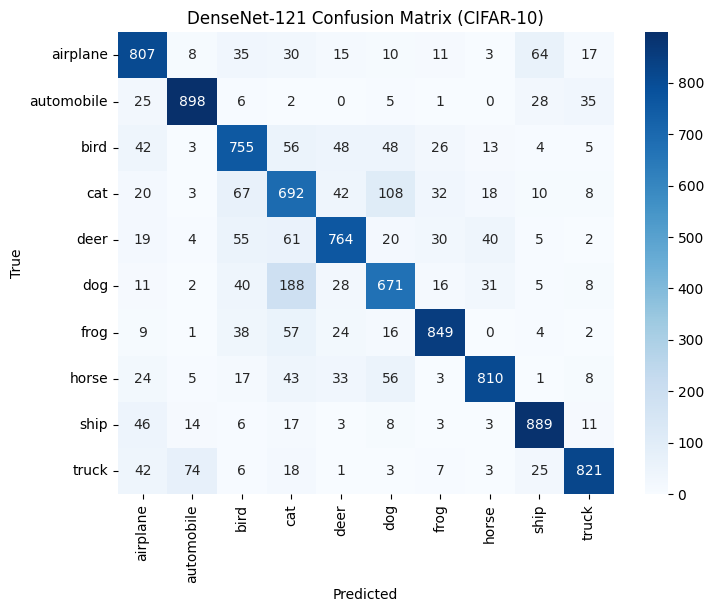

Classification Report:

              precision    recall  f1-score   support

    airplane       0.77      0.81      0.79      1000
  automobile       0.89      0.90      0.89      1000
        bird       0.74      0.76      0.75      1000
         cat       0.59      0.69      0.64      1000
        deer       0.80      0.76      0.78      1000
         dog       0.71      0.67      0.69      1000
        frog       0.87      0.85      0.86      1000
       horse       0.88      0.81      0.84      1000
        ship       0.86      0.89      0.87      1000
       truck       0.90      0.82      0.86      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


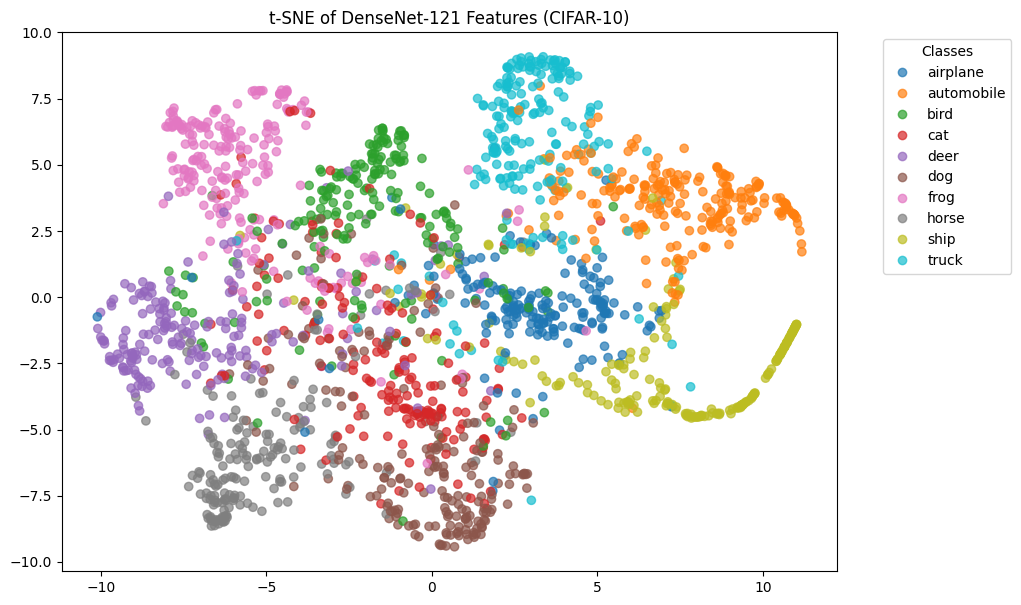

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.manifold import TSNE
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Collect predictions & labels
# -------------------------
all_preds, all_labels, features = [], [], []

def hook(module, input, output):
    features.append(output.detach().cpu().numpy())

# Register hook on DenseNet penultimate layer
hook_handle = model.features.register_forward_hook(hook)

model.eval()
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        preds = outputs.argmax(1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

hook_handle.remove()

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# -------------------------
# Confusion Matrix
# -------------------------
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=trainset.classes, yticklabels=trainset.classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("DenseNet-121 Confusion Matrix (CIFAR-10)")
plt.show()

# -------------------------
# Classification Report
# -------------------------
print("Classification Report:\n")
print(classification_report(all_labels, all_preds, target_names=trainset.classes))

# -------------------------
# t-SNE Visualization (sample for speed)
# -------------------------
features = np.concatenate(features, axis=0)
features = features.reshape(features.shape[0], -1)

# Subsample for speed (optional)
idx = np.random.choice(len(features), size=2000, replace=False)
features_sample = features[idx]
labels_sample = np.array(all_labels)[idx]

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(features_sample)

plt.figure(figsize=(10,7))
scatter = plt.scatter(tsne_results[:,0], tsne_results[:,1],
                      c=labels_sample, cmap="tab10", alpha=0.7)
plt.legend(handles=scatter.legend_elements()[0], labels=trainset.classes,
           title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("t-SNE of DenseNet-121 Features (CIFAR-10)")
plt.show()


In [ ]:
# -------------------------
# Simple Test Accuracy
# -------------------------
model.eval()
correct, total = 0, 0

with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        preds = outputs.argmax(1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

test_acc = correct / total * 100
print(f"Test Accuracy: {test_acc:.2f}%")


Test Accuracy: 80.41%
